In [1]:
# coding: utf-8
#
# CS 6204 - Network Science Project - Prof. Cho
# Demetrius Davis (2019) - dldavis@vt.edu
#

import networkx as nx   
import numpy as np
import numpy.random as rd
import scipy.stats
import matplotlib.pyplot as plt
import random
import warnings

In [2]:
# If you are using Jupyter Notebook you may find following two lines useful:
warnings.filterwarnings('ignore')
% matplotlib inline

In [25]:
#
# GRAPH FRAMEWORK
#
class rndGeometricGraphMaker:
    def __init__(self):
        self.G = []

    def isConnected(self):
        return nx.is_connected(self.G)
    
    def buildGraph(self, node_count, r):
        
        # BUILD HOMOGENEOUS POISSON POINT PROCESS
        node_range = r # meters
        field_width = 200 # meters
        target_density = node_count/pow(field_width,2) # lambda
        node_mobility_probability = 0.6

        # Simulate a Poisson point process
        numbPoints = scipy.stats.poisson(node_count).rvs() #Poisson number of points
        print(numbPoints)
        xx = field_width*scipy.stats.uniform.rvs(0,1,((numbPoints,1))) #x coordinates of Poisson points
        yy = field_width*scipy.stats.uniform.rvs(0,1,((numbPoints,1))) #y coordinates of Poisson points

        # Plotting
        plt.scatter(xx,yy, edgecolor='b', facecolor='none', alpha=0.5)
                
        # BUILD IoT NETWORK MODEL - RANDOM GEOMETRIC GRAPH (G)
        pos = {idx: (xx[idx][0], yy[idx][0]) for idx in range(len(xx))}
        print(pos.values())

        g_seed = 21
        self.G = nx.random_geometric_graph(len(pos), node_range, pos=pos)

        # Check to ensure that the graph is sufficiently connected
        self.is_connected = nx.is_connected(self.G)
        print('Is the graph connected? ' + str(self.isConnected()))
        
        if self.isConnected():
            nx.draw(self.G, pos, node_size=100)
            plt.draw()

71
dict_values([(123.03681073575301, 126.87648488407548), (120.31854975046737, 173.28436219303123), (52.58912972794674, 60.87091887800622), (135.05147841747285, 87.75204124976153), (60.46409948908096, 157.72496305160985), (74.06844418386862, 122.33448997013627), (42.9064928188954, 71.79455892682654), (121.67103942232306, 139.25572696341968), (86.89603410136462, 42.661050814451926), (153.82122557864224, 42.63424831514615), (164.30454280410862, 182.50777739021814), (168.1873836470995, 156.28417497702404), (87.05324675800985, 47.863211853998266), (101.93724687009538, 94.92491089383456), (91.28417427097911, 7.616670710040263), (108.78949620981497, 152.8779473901635), (143.0878405539999, 68.47326945679112), (66.00771066238673, 119.27379680097295), (72.4632649651245, 3.0728243482659234), (111.15805285067889, 191.8619979889528), (50.360060583828, 163.6416080519289), (92.9743320887255, 179.81171627154694), (129.48451908394136, 82.598146283266), (48.96686018570136, 49.58605613565261), (128.1806

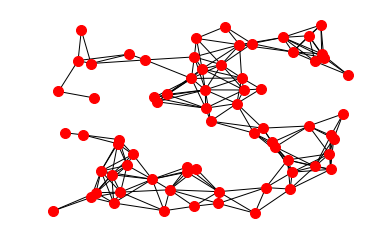

In [24]:
#
# CREATE RANDOM GEOMETRIC GRAPH
#

rgg = rndGeometricGraphMaker()
rgg.buildGraph(75,35)